#Домашнее задание по теме "Обзор основных направлений ИИ"

Канни Эдж Детектор (Canny Edge Detector) — это один из самых известных и широко используемых алгоритмов для обнаружения границ в изображениях.


###Этапы работы Канни Эдж Детектора

1. **Сглаживание изображения (Noise Reduction)**: Первым шагом является применение гауссового фильтра для снижения шумов в изображении. Это делает границы более четкими.

2. **Градиентное преобразование (Gradient Computation)**: Вычисление градиентов изображения, чтобы определить направление и величину изменений интенсивности. Обычно используются операторы Собеля для этого этапа.

3. **Ненаправленное подавление (Non-Maximum Suppression)**: В этом этапе выделяются только те пиксели, которые являются локальными максимумами вдоль направления градиента. Это помогает избавиться от менее выраженных границ.

4. **Двойной порог (Double Thresholding)**: Установка двух пороговых значений для определения сильных и слабых границ. Пиксели, которые превышают высокий порог, считаются границами, а те, что между двумя порогами, будут проверены на связь с сильными границами.

5. **Связывание границ (Edge Tracking by Hysteresis)**: Связывание слабых границ с сильными для окончательного определения границ. Слабые границы, которые соединяются с сильными, считаются границами.

###Пример реализации Канни Эдж Детектора на Python

Вот пример кода на Python, который использует библиотеку OpenCV для реализации Канни Эдж Детектора:



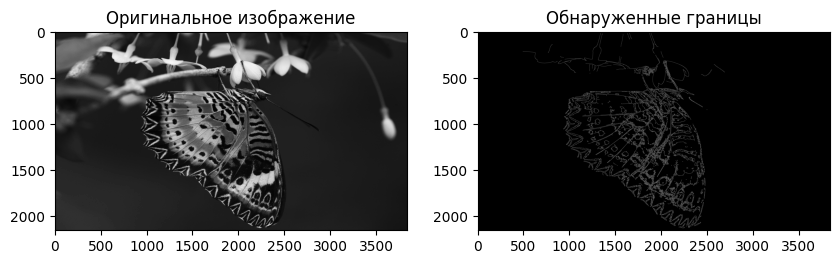

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение гауссового фильтра для снижения шумов
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Применение Канни Эдж Детектора
edges = cv2.Canny(blurred_image, 50, 150)
# 50 и 150 - это  high threshold и low threshold —
# два пороговых значения, которые используются
# для определения сильных и слабых границ на изображении.

# Отображение результата
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

### Домашнее задание

Создайте текстовую ячейку в блокноте и напишите в ней свое понимание ответов на следующие вопросы:

1. **Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?**   

2. **Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?**
   - Поэксперементируйте с примером кода и опишите свои наблюдения.

3. **Используйте Канни Эдж Детектор для различных изображений и сравните результаты. **

4. **Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?**

5. Сохраните свой блокнот, расшарьте его и направьте ссылку на ваш блокнот на проверку преподавателю.

#NB! Не забудьте загрузить в колаб изображения для тестирования (используйте фотографии из своих источников или интернета).
Замените в коде ссылки на изображения, использованные преподавателем, на ваши. Как это сделать - показано в лекции.


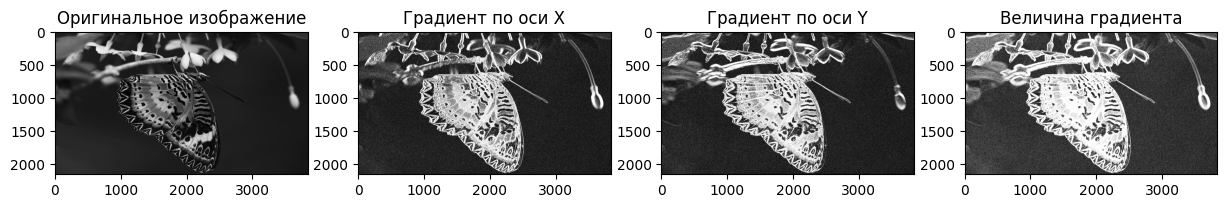

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Загрузка изображения
image = cv2.imread('/content/ED.jpg', cv2.IMREAD_GRAYSCALE)

# Применение оператора Собеля для вычисления градиентов по осям X и Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)  # Градиент по оси X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)  # Градиент по оси Y

# Вычисление величины градиента
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Нормализация градиентов для отображения
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

# Отображение результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()


#**Решение** **ДЗ_3**
#1. Объясните этапы работы Канни Эдж Детектора. Почему каждый этап важен для общего алгоритма?

#Ответ:
  Сглаживание.Используется для уменьшения количества шумов на изображении во избежание появления ложных границ. Для этого применяется размытие фильтром Гаусса или каким-либо матричным фильтром размытия.

  Нахождение градиентов и подавление не-максимумов. Находятся все градиенты яркости, для этого можно использовать, например, оператор Собеля. Чтобы граница была чёткой и понятной, она должна быть представлена тонкой линией. Поэтому границей будут являться те пиксели, в которых достигается локальный максимум градиента в направлении вектора градиента.

  Двойная пороговая фильтрация и трассировка области неоднозначности.На данном шаге производится ещё одна фильтрация ложных границ. В детекторе границ Канни используется два порога: нижний и верхний. Пиксель, значение которого выше верхней границы, принимает максимальное значение, то есть контур считается достоверным. Если значение пикселя не достигает нижнего порога — пиксель подавляется. Если его значение попадает в диапазон между порогами, то он принимает среднее значение, а решение о том, является ли он точкой границы, будет принято во время трассировки области неоднозначности.

  Каждый этап важен для общего алгоритма, так как позволяет детектору не выявлять ложные границы (например, на шумы), правильно и не фрагментировано определять линию границы, и лишь единожды реагировать на каждую границу, чтобы избежать появления широких полос.

#2/3. Как выбор значений для двойного порога (high и low threshold) влияет на результаты работы Канни Эдж Детектора?

Поэксперементируйте с примером кода и опишите свои наблюдения.

*Используйте Канни Эдж Детектор для различных изображений и сравните результаты. *

#Ответ:

1. Пороговые значения и их влияние
Нижний порог (low threshold) — определяет минимальный уровень градиента, при котором пиксель может рассматриваться как часть границы. Чем ниже этот порог, тем больше границ будет включено, но также увеличивается вероятность ложных срабатываний из-за шума.

2. Верхний порог (high threshold) — задает уровень, при котором пиксель будет гарантированно считаться частью границы. Чем выше порог, тем меньше будет шумовых границ, но есть риск потери слабых и тонких границ, если они не соответствуют этому уровню.

Высокие пороговые значения приводят к выделению только самых ярких границ.

Низкие пороговые значения могут добавить шум, так как слабо выраженные градиенты тоже будут рассматриваться как границы.

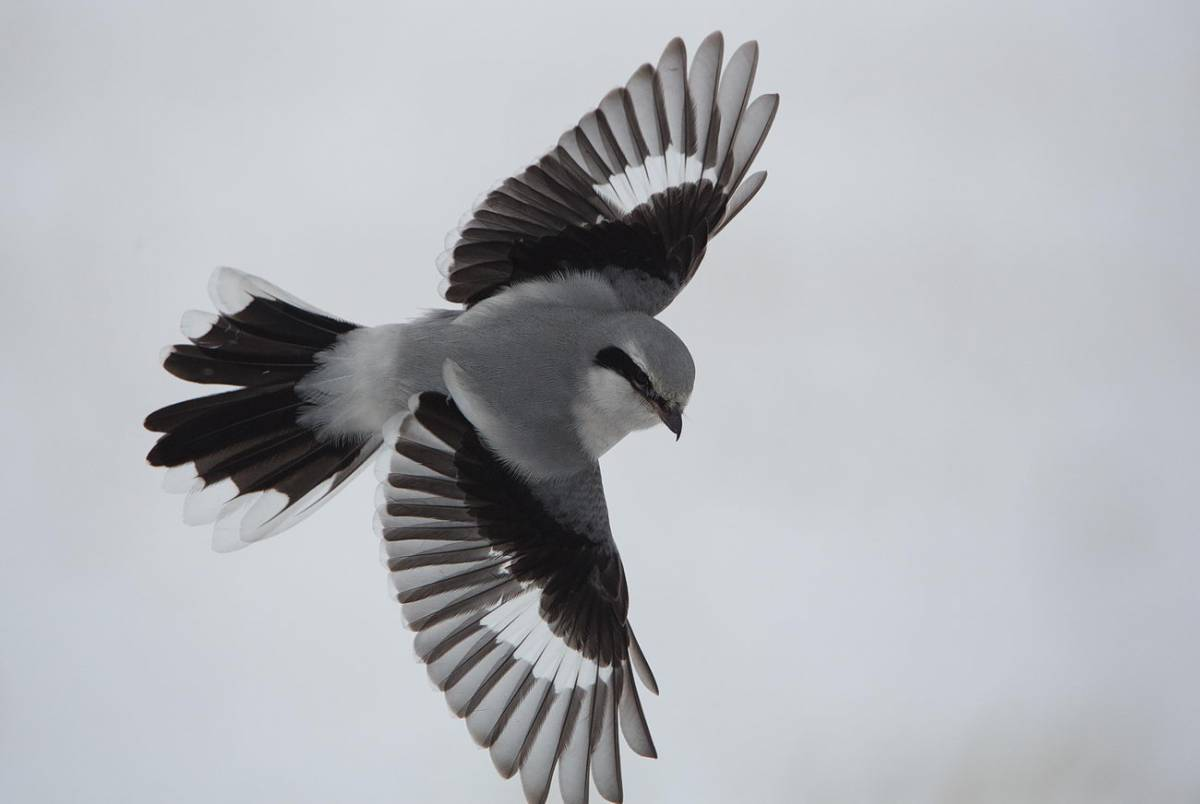

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


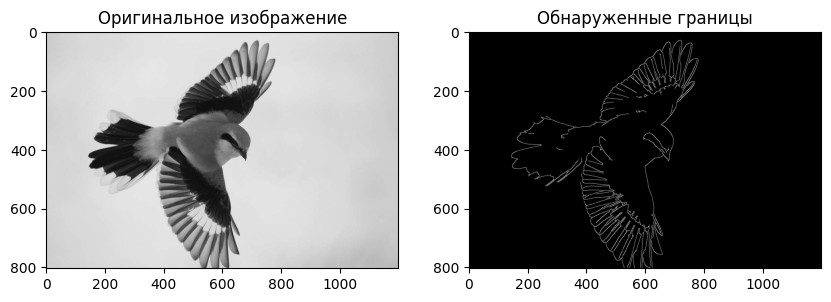

In [12]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image1.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

edges = cv2.Canny(blurred_image, 50, 150)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

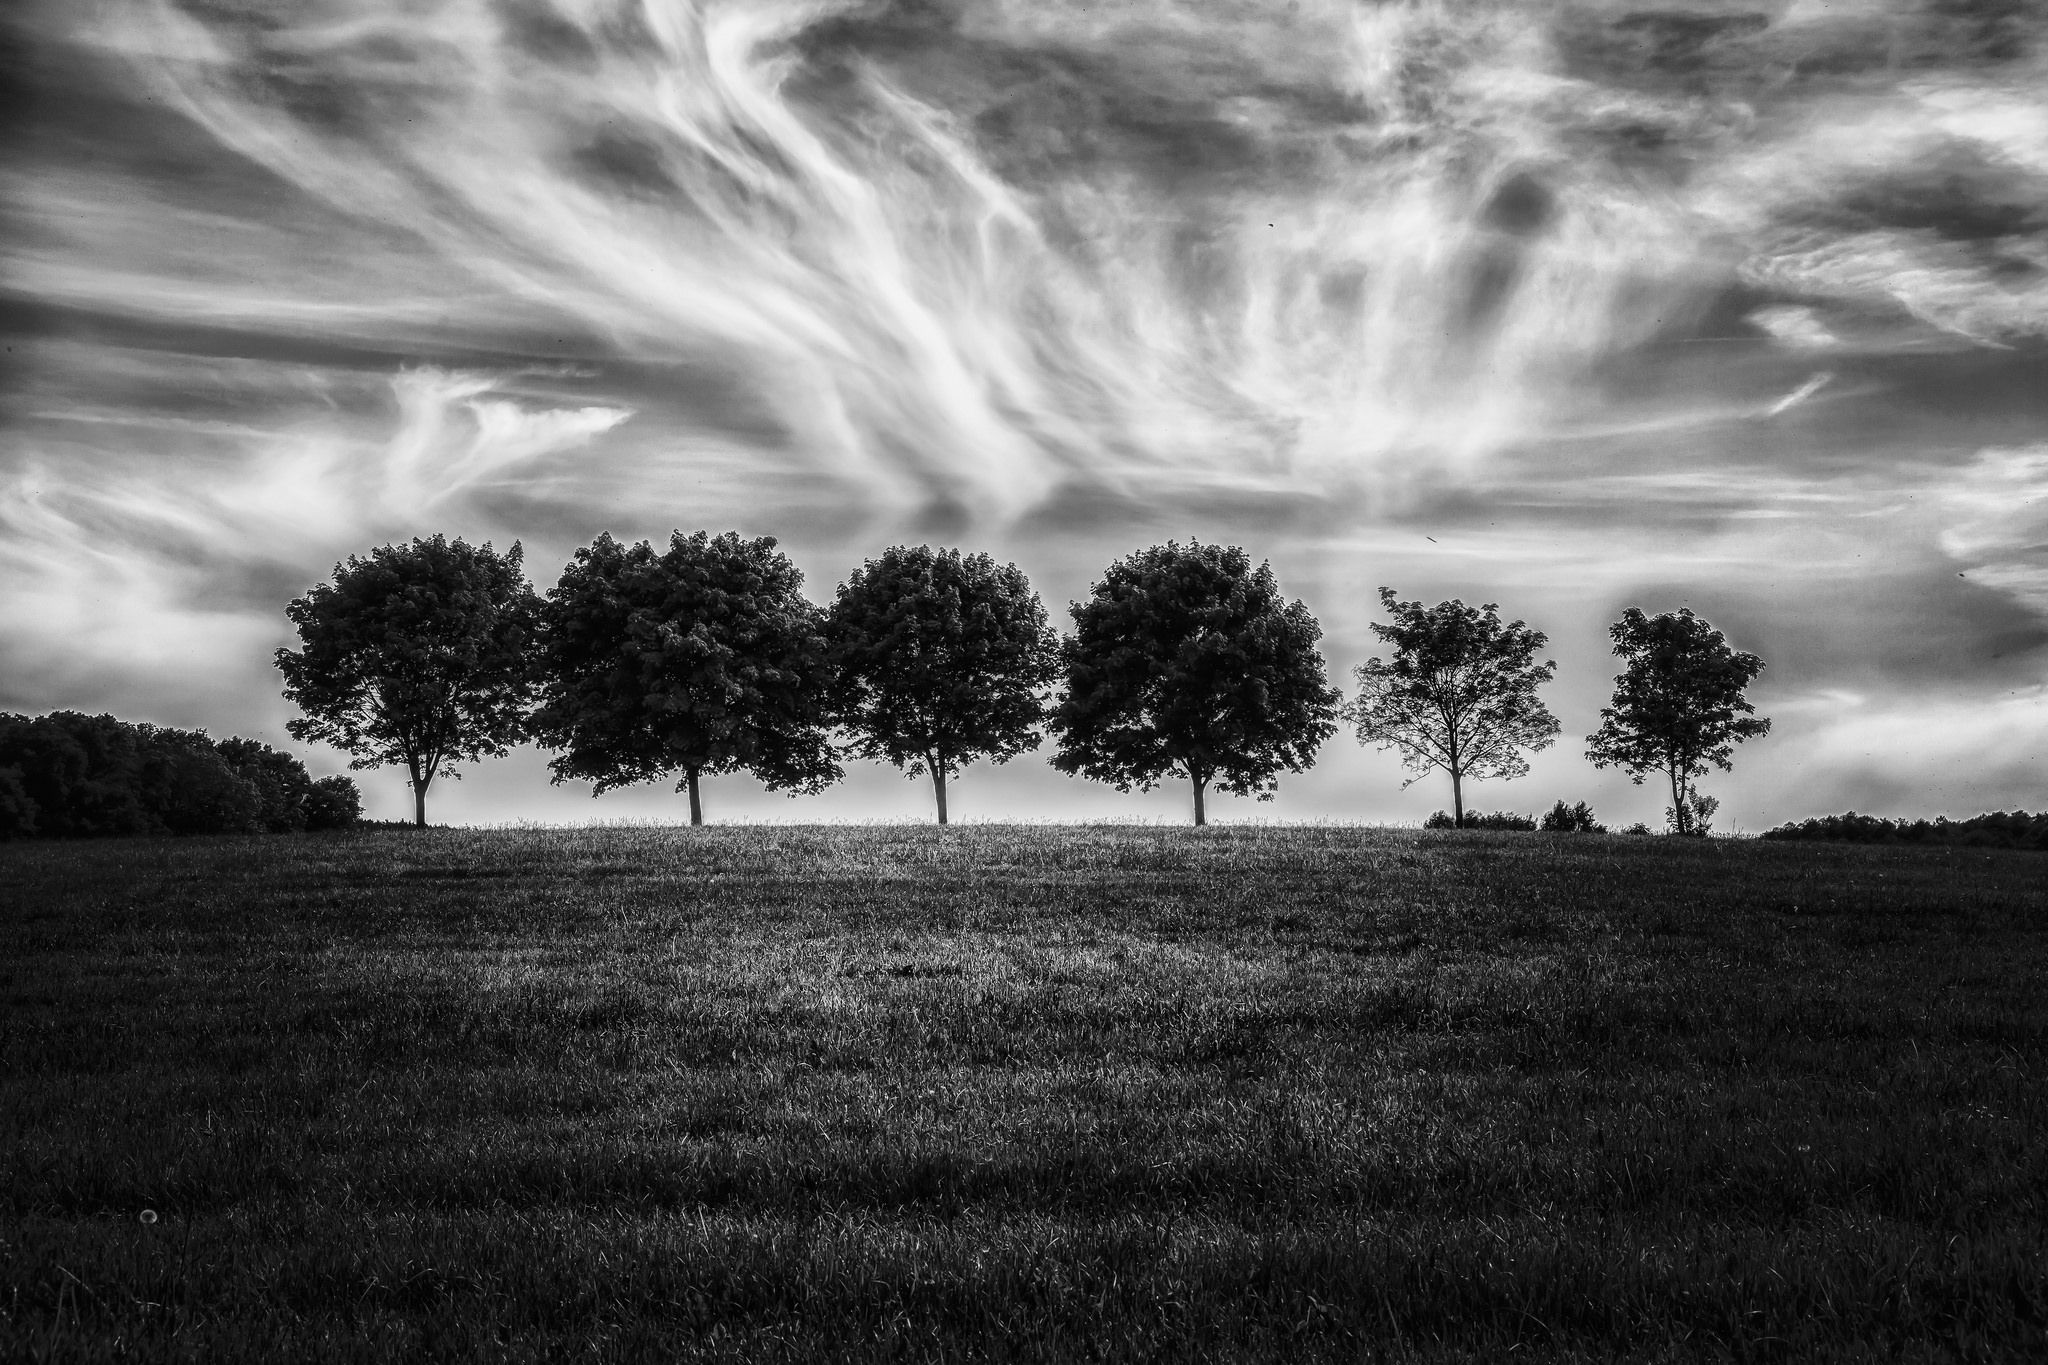

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


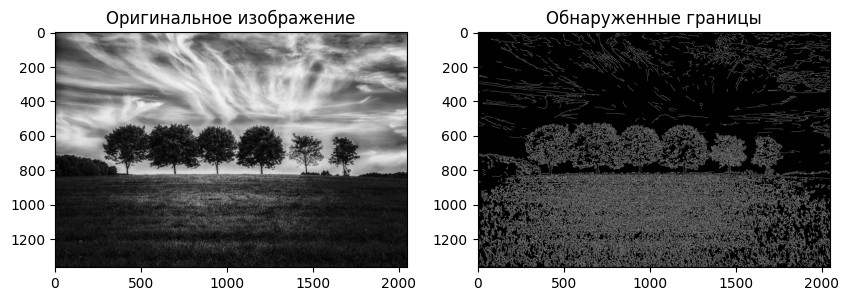

In [19]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image3.jpg', cv2.IMREAD_GRAYSCALE)

blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)

edges = cv2.Canny(blurred_image, 10, 50)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Обнаруженные границы')
plt.imshow(edges, cmap='gray')

plt.show()

Эксперименты с разными пороговыми значениями показывают, что выбор значений для двойного порога критически важен для правильной работы детектора Канни. Оптимальные пороги зависят от изображения: для четких и контрастных сцен подойдут более высокие пороги, а для детализированных и слабоконтрастных изображений лучше использовать мягкие пороги.

#4. Используйте приведенный ниже код для визуализации градиентов в изображении. Подумайте: как можно использовать эти градиенты для других задач в компьютерном зрении?


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


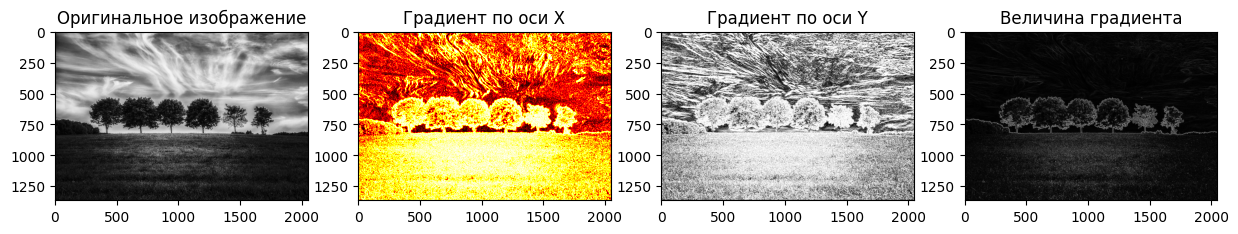

In [35]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/image3.jpg', cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
#gradient_magnitude = cv2.convertScaleAbs(gradient_magnitude)

#Лапласиан (для усиления областей с резким изменением яркости):
laplacian = cv2.Laplacian(image, cv2.CV_64F)
laplacian = cv2.convertScaleAbs(laplacian)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title('Оригинальное изображение')
plt.imshow(image, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Градиент по оси X')
plt.imshow(sobel_x, cmap='hot')

plt.subplot(1, 4, 3)
plt.title('Градиент по оси Y')
plt.imshow(sobel_y, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Величина градиента')
plt.imshow(gradient_magnitude, cmap='gray')

plt.show()

В задачах анализа видео, градиенты могут помочь в вычислении движения объектов. Сравнивая градиенты на последовательных кадрах, можно определить направление и скорость движения объектов.

В дополнение к основным применениям, градиенты также могут быть полезны для улучшения качества изображений (например, для удаления шума), а также в улучшении алгоритмов обработки изображений с учетом их контуров и текстур.